
# Colour Balancing

In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

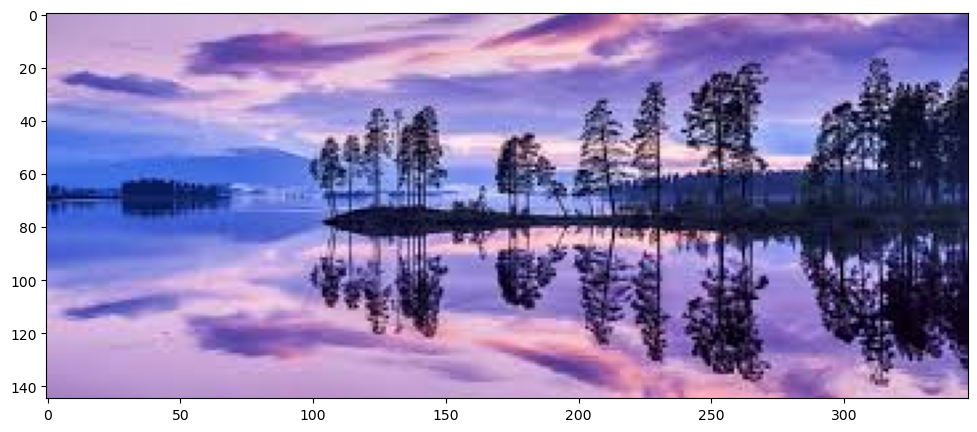

In [2]:
img = cv2.imread('lake.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
print(img.shape)

(145, 347, 3)


### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x143967700>)

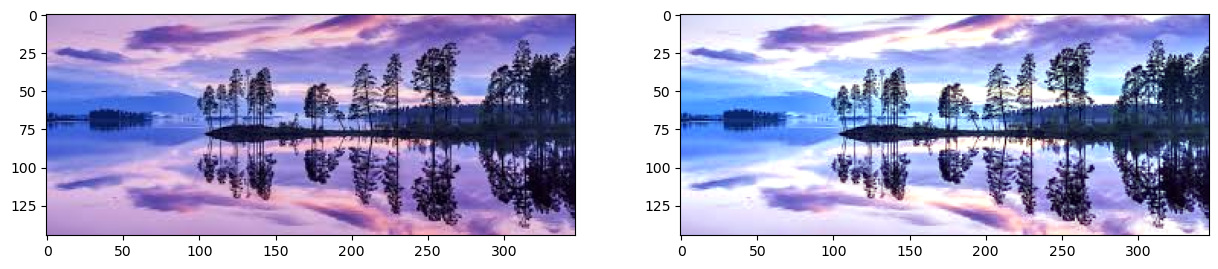

In [4]:
# Defining white patch and the coefficients
row, col = 144, 346
white = img[row, col, :]
coeffs = 255.0/white

# Appling white balancing and generating balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

In [19]:
# Loading an image
img = cv2.imread('nature.jpeg')
#img = cv2.imread('presentation_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [20]:
print(img.shape)

(148, 198, 3)


In [21]:
# Computing the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

mean_r, mean_g, mean_b

(94.81842069342069, 125.70925470925471, 95.69939257439258)

In [22]:
# Computing the coefficients kr, kg, kb

overall_mean = (mean_r + mean_g + mean_b) / 3

kr = overall_mean / mean_r
kg = overall_mean / mean_g
kb = overall_mean / mean_b



overall_mean, kr, kg, kb

(105.40902265902265, 1.1116935073180019, 0.838514418869293, 1.1014596835301982)

(<Axes: >, <matplotlib.image.AxesImage at 0x143ed0040>)

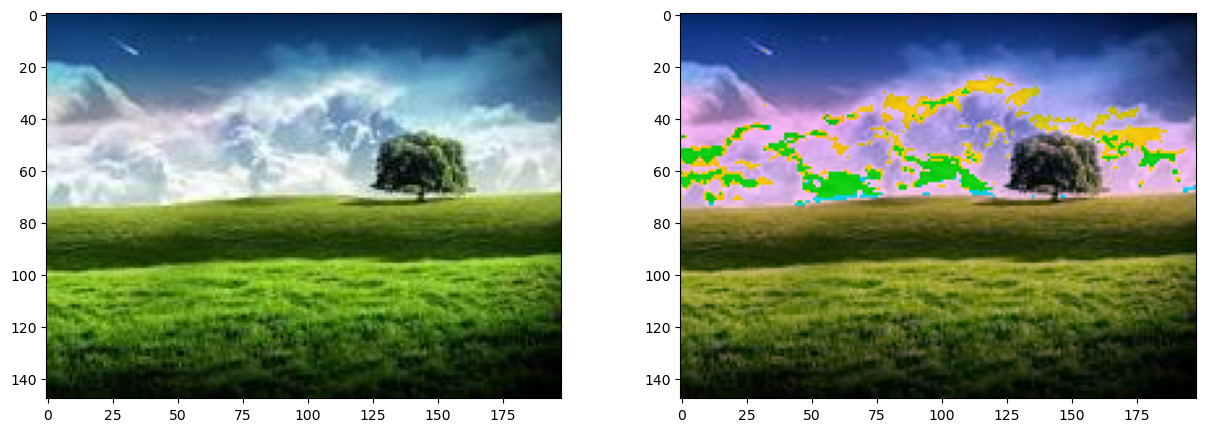

In [23]:
# Appling color balancing and generating the balanced image


balanced = np.zeros_like(img)
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Showing the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x1439671f0>)

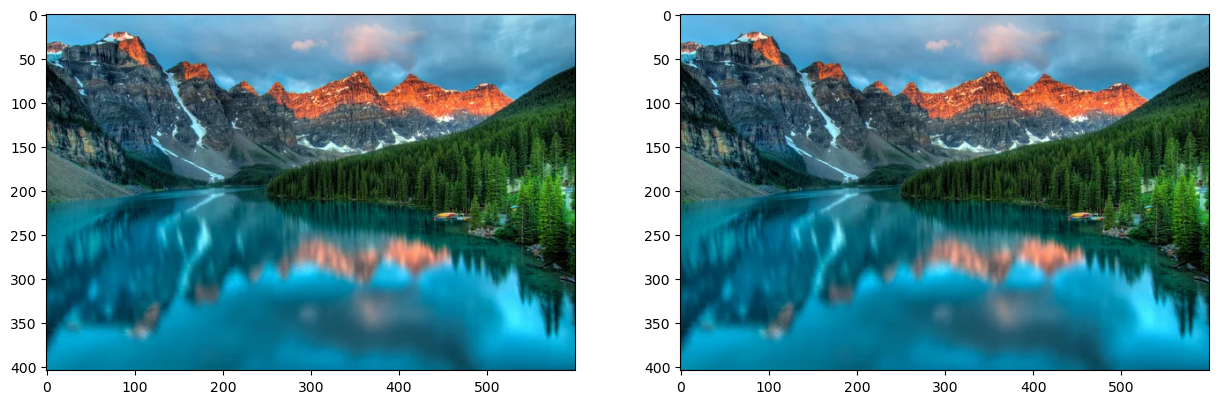

In [10]:
# Loading an image
img = cv2.imread('sunset.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Computing the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

# Applying scale-by-max balancing and generating the balanced image
balanced = np.zeros_like(img)
balanced[:, :, 0] = (img[:, :, 0] / max_r) * 255
balanced[:, :, 1] = (img[:, :, 1] / max_g) * 255
balanced[:, :, 2] = (img[:, :, 2] / max_b) * 255

balanced = balanced/255
balanced[balanced > 1] = 1


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)